# State variables from Wofost

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib
matplotlib.rcParams['figure.figsize']  = (10.0, 6.0)
from uq_util import *

Platform not recognized, using system temp directory for PCSE settings.
Platform not recognized, using system temp directory for PCSE settings.


# Experiments 

In [2]:
params, wdp, agromanagement = example_wofost_params()

# Simulate with different radiation functions

## Assume absorbed radiation is linear on LAI

In [4]:
# Assume absorbed radiation is linear on LAI:
wofost = Wofost71_WLP_FD(params, wdp, agromanagement) #waterlimited production
wofost.run_till_terminate()
output = wofost.get_output()
len(output)

141

In [7]:
# plot_wofost_variables(output, varnames=None)
with open('tmp_data/linear_rad.json', 'w') as outfile:
    json.dump(output, outfile, default=json_serial)

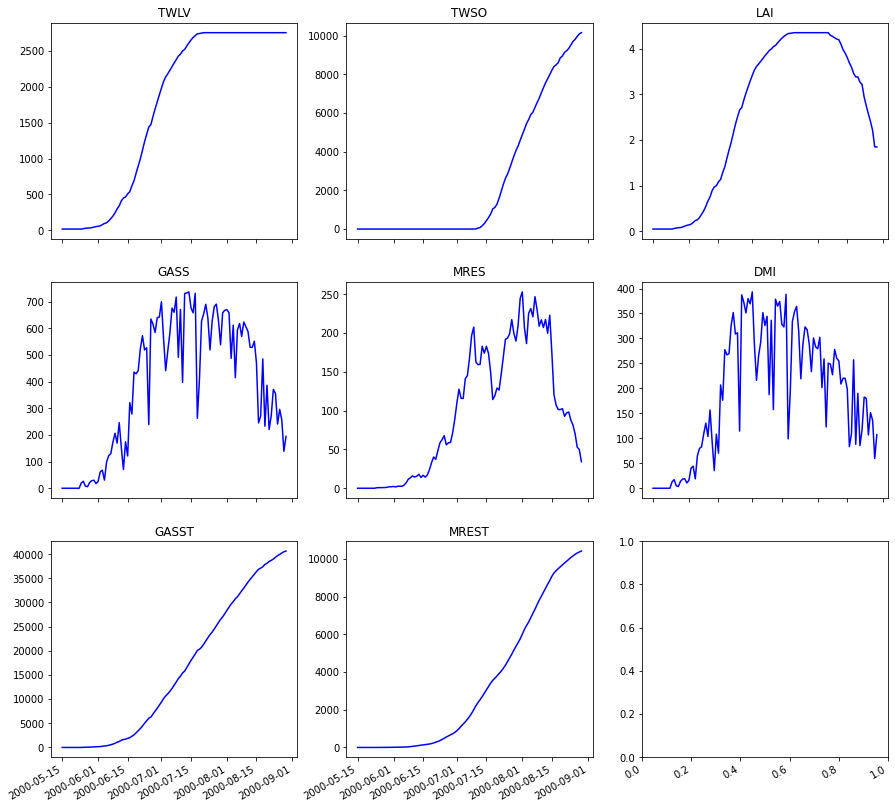

(<Figure size 1080x1080 with 9 Axes>,
 array([[<AxesSubplot:title={'center':'TWLV'}>,
         <AxesSubplot:title={'center':'TWSO'}>,
         <AxesSubplot:title={'center':'LAI'}>],
        [<AxesSubplot:title={'center':'GASS'}>,
         <AxesSubplot:title={'center':'MRES'}>,
         <AxesSubplot:title={'center':'DMI'}>],
        [<AxesSubplot:title={'center':'GASST'}>,
         <AxesSubplot:title={'center':'MREST'}>, <AxesSubplot:>]],
       dtype=object))

In [8]:
vars_of_interest = ['day', 'TWLV', 'TWSO', 'LAI', 'GASS', 'MRES', 'DMI', 'GASST', 'MREST',]
plot_wofost_variables(output, varnames=vars_of_interest)

## Assume absorbed radiation doesn't depend on LAI

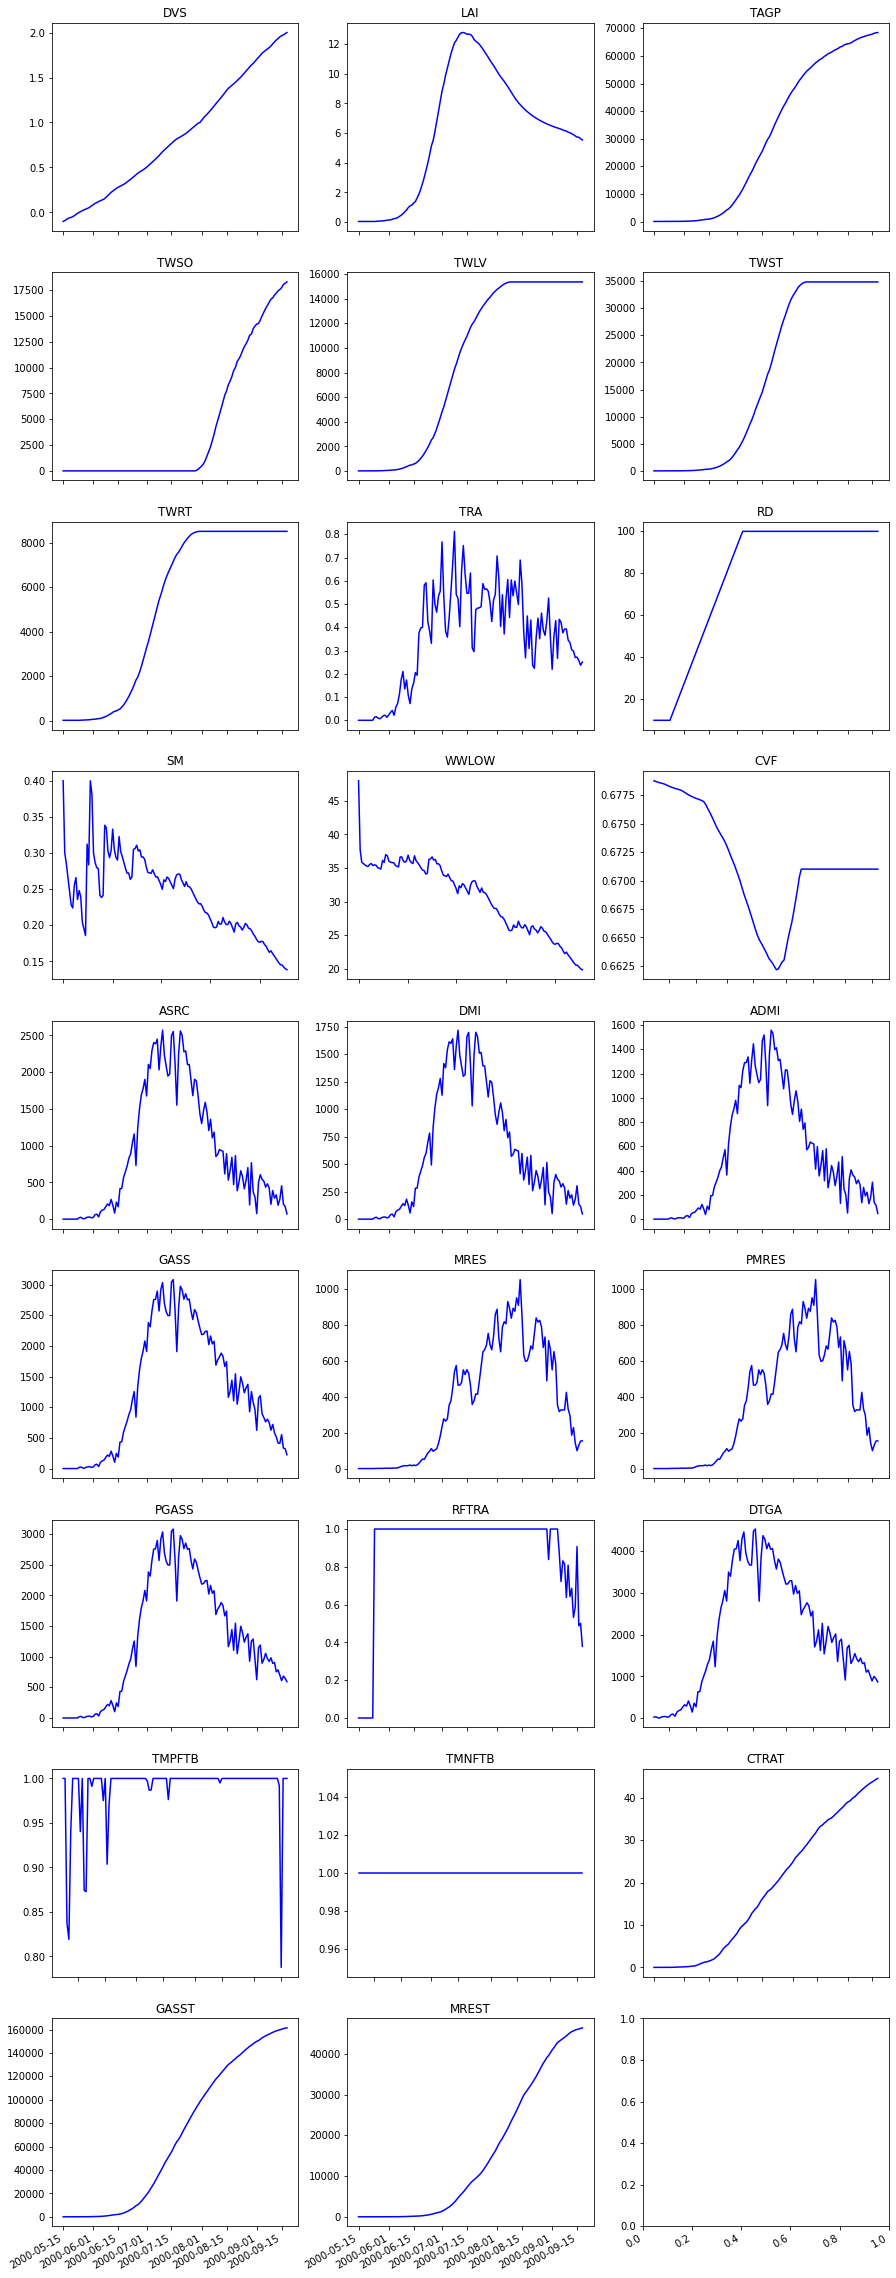

In [10]:
# Assume absorbed radiation doesn't depend on LAI:
wofost = Wofost71_WLP_FD(params, wdp, agromanagement) #waterlimited production
wofost.run_till_terminate()
output = wofost.get_output()
# plot_wofost_variables(output, varnames=None)
with open('tmp_data/constant_rad.json', 'w') as outfile:
    json.dump(output, outfile, default=json_serial)

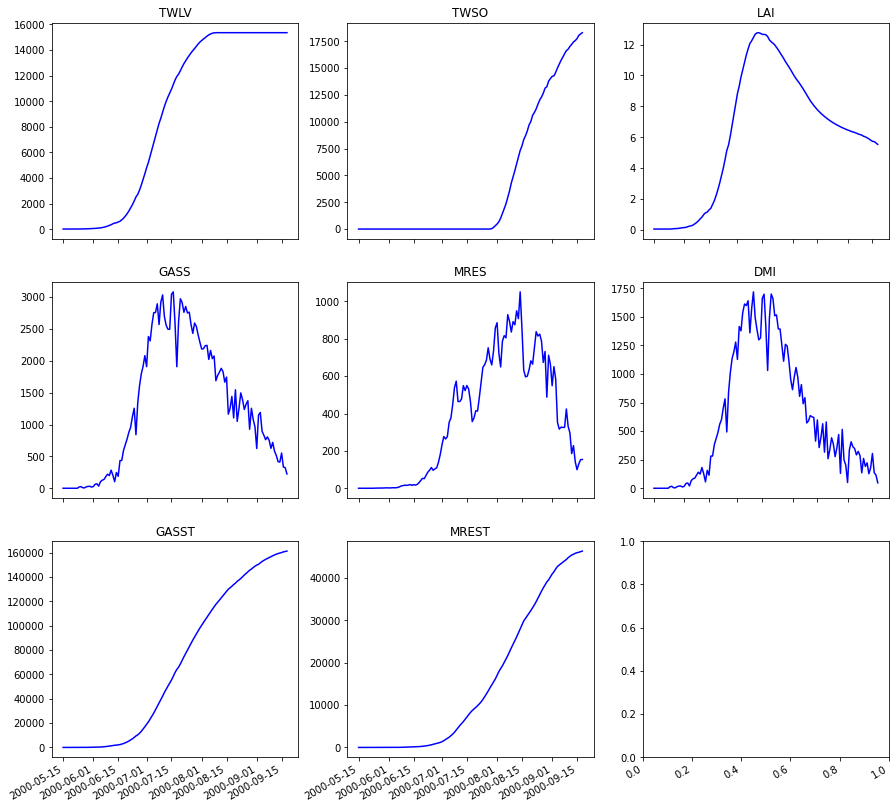

In [11]:
vars_of_interest = ['day', 'TWLV', 'TWSO', 'LAI', 'GASS', 'MRES', 'DMI', 'GASST', 'MREST',]
plot_wofost_variables(output, varnames=vars_of_interest)

## Assume absorbed radiation is exp(-LAI) - Original Wofost

In [10]:
# # Original Wofost, exp(-LAI)
# wofost = Wofost71_WLP_FD(params, wdp, agromanagement) #waterlimited production
# wofost.run_till_terminate()
# output = wofost.get_output()
# len(output)
# plot_wofost_variables(output, varnames=None)
# with open('tmp_data/exp_rad.json', 'w') as outfile:
#     json.dump(output, outfile, default=json_serial)

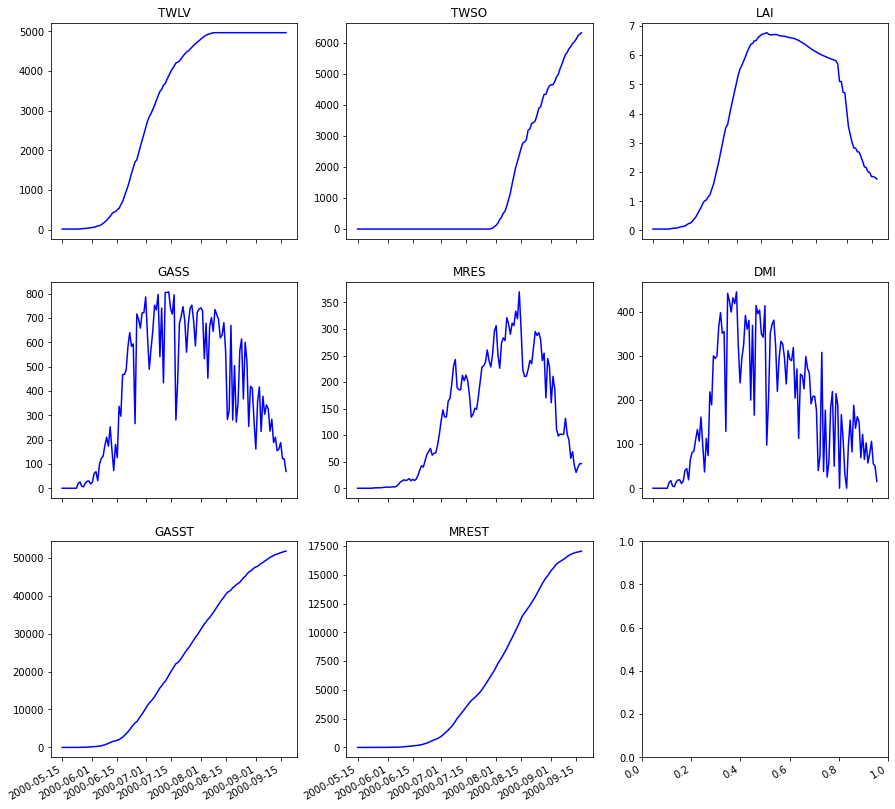

(<Figure size 1080x1080 with 9 Axes>,
 array([[<AxesSubplot:title={'center':'TWLV'}>,
         <AxesSubplot:title={'center':'TWSO'}>,
         <AxesSubplot:title={'center':'LAI'}>],
        [<AxesSubplot:title={'center':'GASS'}>,
         <AxesSubplot:title={'center':'MRES'}>,
         <AxesSubplot:title={'center':'DMI'}>],
        [<AxesSubplot:title={'center':'GASST'}>,
         <AxesSubplot:title={'center':'MREST'}>, <AxesSubplot:>]],
       dtype=object))

In [12]:
vars_of_interest = ['day', 'TWLV', 'TWSO', 'LAI', 'GASS', 'MRES', 'DMI', 'GASST', 'MREST',]
plot_wofost_variables(output, varnames=vars_of_interest)

In [13]:
# Compare 3 settings on one plot
with open('tmp_data/constant_rad.json') as f:
    output_const = json.load(f)

In [14]:
with open('tmp_data/linear_rad.json') as f:
    output_lin = json.load(f)

In [15]:
with open('tmp_data/exp_rad.json') as f:
    output_exp = json.load(f)

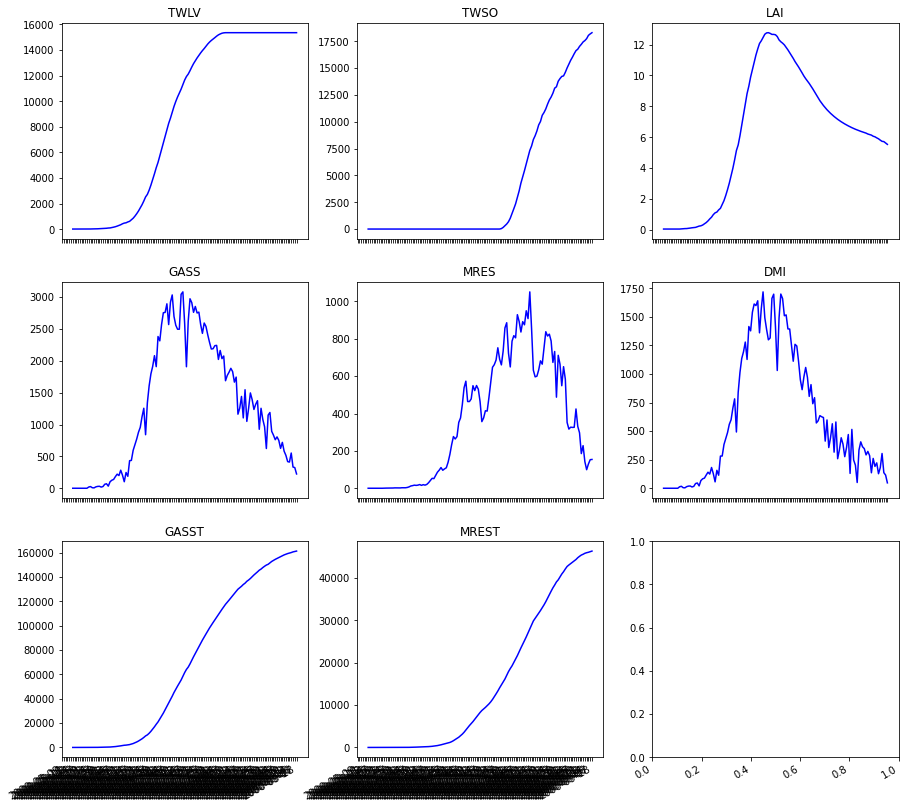

In [16]:
vars_of_interest = ['day', 'TWLV', 'TWSO', 'LAI', 'GASS', 'MRES', 'DMI', 'GASST', 'MREST',]
fig, axes = plot_wofost_variables(output_const, varnames=vars_of_interest, fig=None, axes=None)

In [17]:
vars_of_interest = ['day', 'TWLV', 'TWSO', 'LAI', 'GASS', 'MRES', 'DMI', 'GASST', 'MREST',]
fig, axes = plot_wofost_variables(output_lin, vars_of_interest, fig, axes)

In [18]:
vars_of_interest = ['day', 'TWLV', 'TWSO', 'LAI', 'GASS', 'MRES', 'DMI', 'GASST', 'MREST',]
fig, axes = plot_wofost_variables(output_exp, vars_of_interest, fig, axes)

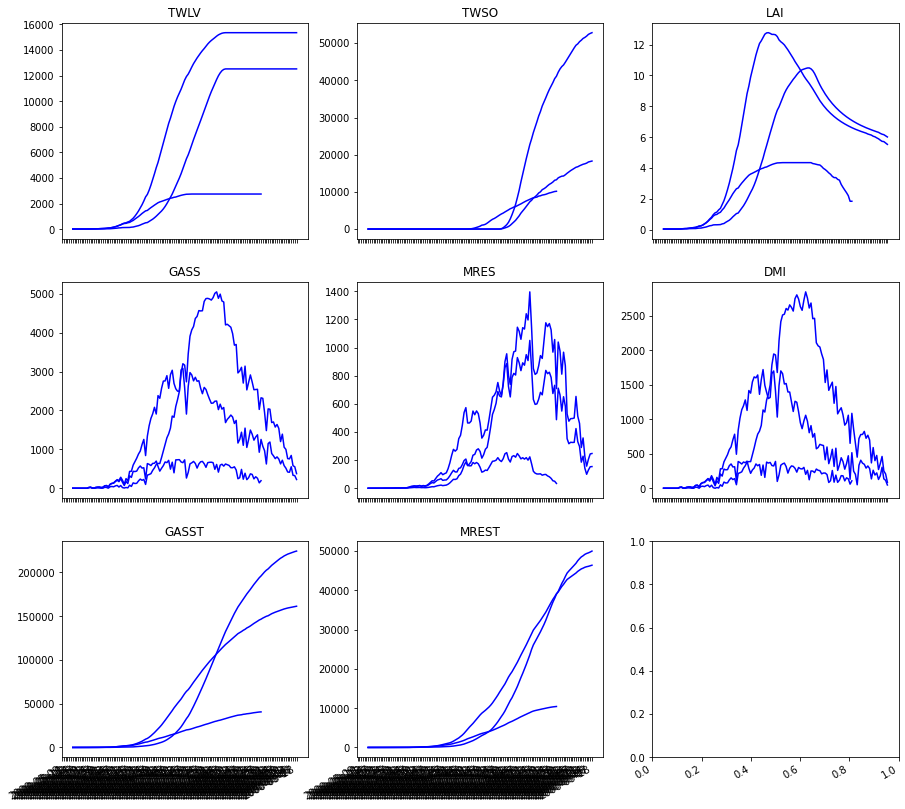

In [19]:
fig

In [ ]:
# def plot_wofost_variables_many_outputs(outputs, varnames=None):
#     for i in in range(len(outputs)):
#         tmp, varnames = get_time_series_output(output, varnames)
#         day = tmp.pop("day")
#         varnames.remove("day")
#         n=len(varnames)
#         if i == 0:
#             fig, axes = plt.subplots(nrows=n//3+1, ncols=3, figsize=(15, 5*(n//3+1)))
#         for var, ax in zip(varnames, axes.flatten()):
#             ax.plot_date(day, tmp[var], 'b-')
#             ax.set_title(var)
#             fig.autofmt_xdate()

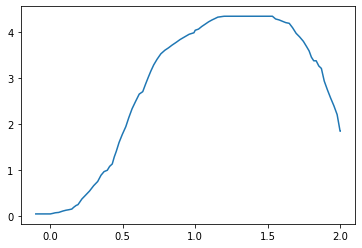

In [44]:
plot_dynamics(output, x='DVS', y='LAI')

# PLOT DYNAMICS

In [6]:
# Original Wofost, exp(-LAI)
wofost = Wofost71_WLP_FD(params, wdp, agromanagement) #waterlimited production
wofost.run_till_terminate()
output = wofost.get_output()
len(output)

121

In [7]:
output[70]

{'day': datetime.date(2000, 7, 10),
 'DVS': 0.9910503597122301,
 'LAI': 3.9920128906689776,
 'TAGP': 6914.5800609364815,
 'TWSO': 5.067627344070707,
 'TWLV': 2453.1945695199684,
 'TWST': 4456.317864072443,
 'TWRT': 1525.0516244597038,
 'TRA': 0.43841685951300247,
 'RD': 100.0,
 'SM': 0.269422816552751,
 'WWLOW': 32.9422816552751,
 'CVF': 0.6628202934628594,
 'ASRC': 507.5888157312975,
 'DMI': 336.4401678014839,
 'ADMI': 334.63355671337575,
 'GASS': 670.3906643430572,
 'MRES': 162.80184861175974,
 'PMRES': 162.80184861175974,
 'PGASS': 670.3906643430572,
 'RFTRA': 1.0,
 'DTGA': 983.2396410364838,
 'TMPFTB': 1.0,
 'TMNFTB': 1.0,
 'CTRAT': 10.856687565866656,
 'GASST': 14740.550289637149,
 'MREST': 2216.2832466078726,
 'VISSHD': 4.4043729791974595,
 'VISPP': 114.0023913106001,
 'FGRSH': 1.9541722450797638,
 'FGRSUN': 21.767884667833627,
 'FSLLA': 0.0029000476914934218,
 'FGL': 2.011632956051286,
 'KDIRBL': 2.927359333152456,
 'KDIRT': 2.618309785398938,
 'KDIF': 0.6,
 'REFS': 0.0906770404

# Early Growth, after emerging, before flowering, DVS < 1

In [8]:
output1 = output[25:70] # DVS below 1, LAI below 4
wo = WofostOutput(output1)
wo_all =  WofostOutput(output[25:])

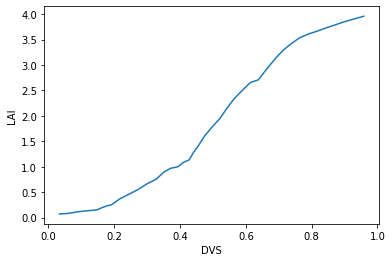

In [9]:
plot_dynamics(output1, x='DVS', y='LAI')

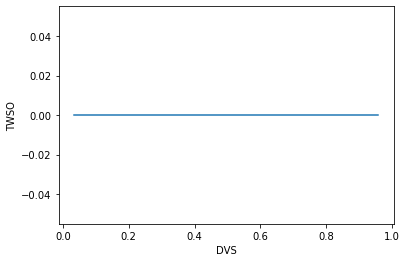

In [10]:
# No yield yet, focusing on leaf dynamics!
plot_dynamics(output1, x='DVS', y='TWSO')

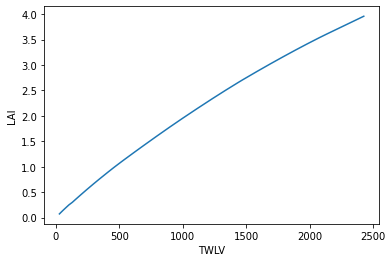

In [11]:
plot_dynamics(output1, x='TWLV', y='LAI')

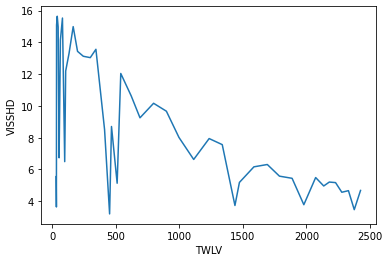

In [12]:
plot_dynamics(output1, x='TWLV', y='VISSHD') # As LAI increases, less absorbed radiation by shaded leaves

In [13]:
# plot_dynamics(output1, x='TWLV', y='PARDIR') 
# Absorbed direct radiation doesn't depend on LAI, TWLV. It depends on the day.

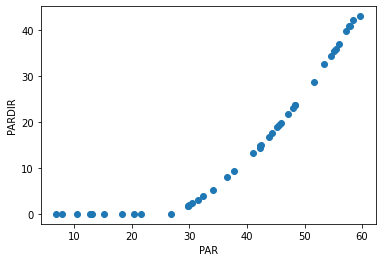

In [14]:
plot_scatter_dynamics(output1, x='PAR', y='PARDIR', color_time=False)

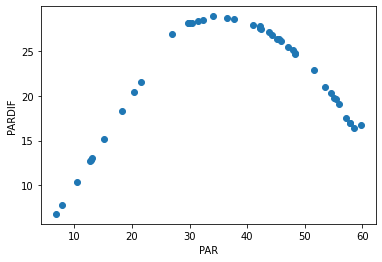

In [15]:
plot_scatter_dynamics(output1, x='PAR', y='PARDIF', color_time=False)

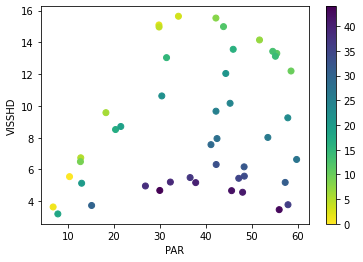

In [16]:
plot_scatter_dynamics(output1, x='PAR', y='VISSHD')

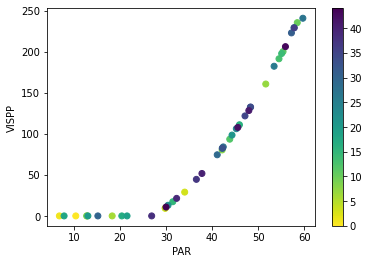

In [17]:
plot_scatter_dynamics(output1, x='PAR', y='VISPP')

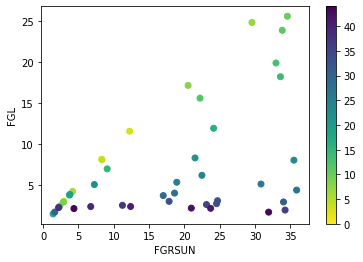

In [18]:
plot_scatter_dynamics(output1, x='FGRSUN', y='FGL')

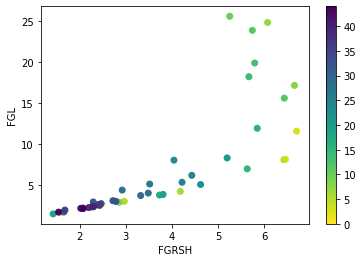

In [19]:
plot_scatter_dynamics(output1, x='FGRSH', y='FGL')

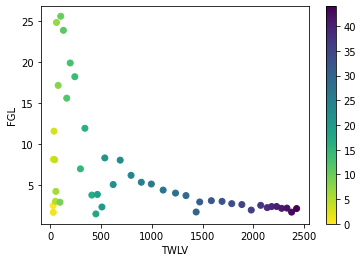

In [20]:
plot_scatter_dynamics(output1, x='TWLV', y='FGL')

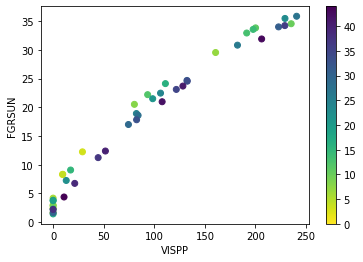

In [21]:
plot_scatter_dynamics(output1, x='VISPP', y='FGRSUN')

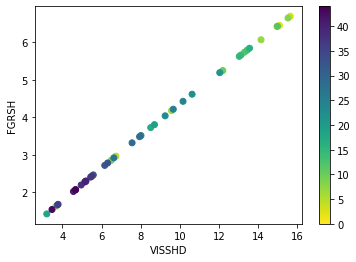

In [22]:
plot_scatter_dynamics(output1, x='VISSHD', y='FGRSH')

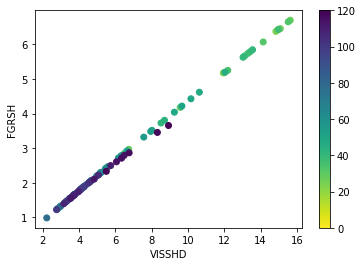

In [23]:
plot_scatter_dynamics(output, x='VISSHD', y='FGRSH')

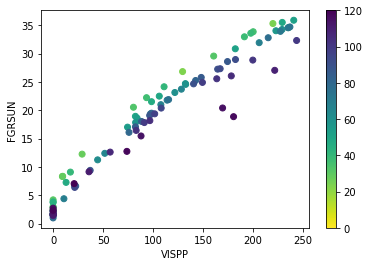

In [24]:
plot_scatter_dynamics(output, x='VISPP', y='FGRSUN')

In [25]:
tmp, varnames = get_time_series_output(output1)
# varnames

Text(0, 0.5, 'Absorbed diffuse radiation')

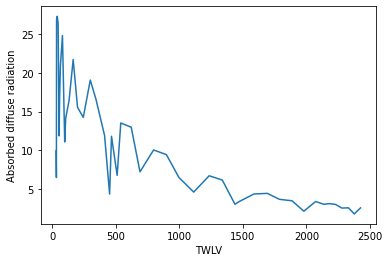

In [26]:
w_leaf = np.array(wo.TWLV)
lai = np.array(tmp['LAI'])
w_leaf
visshd = np.array(tmp['VISSHD'])
pardif = np.array(tmp['PARDIF'])
par = np.array(tmp['PAR'])
kdif = 0.6
y = pardif * np.exp(-kdif*lai)
plt.plot(w_leaf, y)
plt.xlabel('TWLV')
plt.ylabel('Absorbed diffuse radiation')

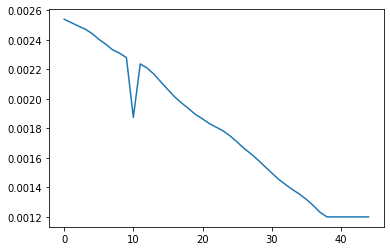

In [27]:
# Warning! During exponential growth, i.e. LAI < 6, SLAT=GLA/GRLV --> Not from SLATB. Not constant.
plt.plot(np.array(tmp['SLAT']))


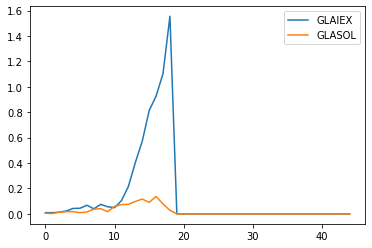

In [28]:
plt.plot(tmp["GLAIEX"], label="GLAIEX")
plt.plot(tmp["GLASOL"], label="GLASOL")
plt.legend()

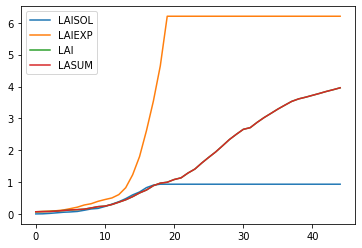

In [29]:
glasol_lai = np.array(tmp["GLASOL"]).cumsum()
plt.plot(glasol_lai, label="LAISOL")
plt.plot(tmp["LAIEXP"], label="LAIEXP")
plt.plot(tmp["LAI"], label="LAI")
plt.plot(tmp["LASUM"], label="LASUM") # LASUM = LAI
plt.legend()

In [30]:
# # Check the partitioning coefficient for W_leaf! 
# plt.plot(wo.GRLV.cumsum(), label='grlv cumsum')
# plt.plot(wo.TWLV, label='og twlv')
# tmp_twlv = ((wo.DMI)*(1-wo.FR)*(wo.FL)).cumsum()
# plt.plot(tmp_twlv, label='dmi cumsum')
# plt.legend()

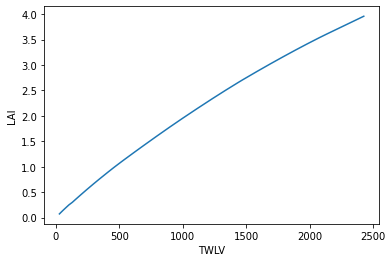

In [31]:
plot_dynamics(output1, "TWLV", "LAI")

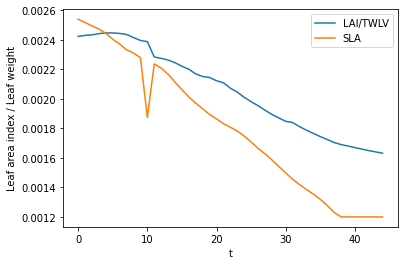

In [32]:
plt.plot(wo.LAI/wo.TWLV, label='LAI/TWLV')
plt.plot(wo.SLAT, label='SLA')
plt.ylabel('Leaf area index / Leaf weight')
plt.xlabel('t')
plt.legend()

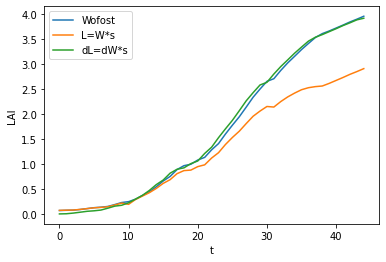

In [33]:
# Careful! LAI != W_leaf * SLA, it is LAI = (W_leaf * SLA).cumsum()
lai_linear = (np.array(tmp['GRLV']) * np.array(tmp['SLAT'])).cumsum()# + SAI + PAI, but they're 0 anyways.
lai_linear_wlv = np.array(tmp['TWLV']) * np.array(tmp['SLAT']) # Doesn't matter WLV or TWLV, death rate small
# lai_linear_pseudo = wo.TWLV * wo.LAI/wo.TWLV # Doesn't matter WLV or TWLV, death rate small
plt.plot(lai, label='Wofost')
plt.plot(lai_linear_wlv, label='L=W*s')
plt.plot(lai_linear, label='dL=dW*s')
# plt.plot(lai_linear_pseudo, label='pseudo')

plt.xlabel('t')
plt.ylabel('LAI')
plt.legend()

Text(0, 0.5, 'Absorbed radiation')

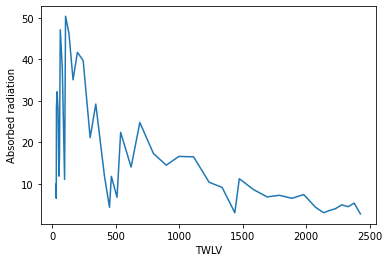

In [34]:
y = par * np.exp(-kdif*lai)
plt.plot(w_leaf, y)
plt.xlabel('TWLV')
plt.ylabel('Absorbed radiation')

Text(0, 0.5, 'Absorbed ave radiation')

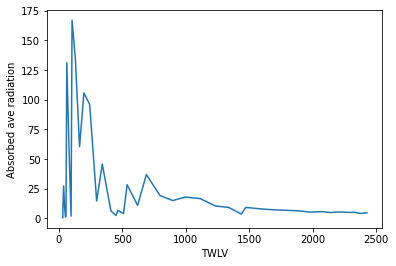

In [35]:
w_leaf = np.array(tmp['TWLV'])
dvs = np.array(tmp['DVS'])
lai = np.array(tmp['LAI'])
visshd = np.array(tmp['VISSHD']) # shaded absorbed
vispp = np.array(tmp['VISPP']) # direct absorbed
fslla = np.array(tmp['FSLLA'])
I_a = fslla * vispp + (1 - fslla) * visshd
plt.plot(w_leaf, I_a)
plt.xlabel('TWLV')
plt.ylabel('Absorbed ave radiation')

In [36]:
# assim = 70*(1 - np.exp(-I_a))
# plt.plot(w_leaf, assim)
# plt.xlabel('TWLV')
# plt.ylabel('Assimilation')

In [37]:
# plot_scatter_dynamics(output1, x='LAI', y='VISSHD')


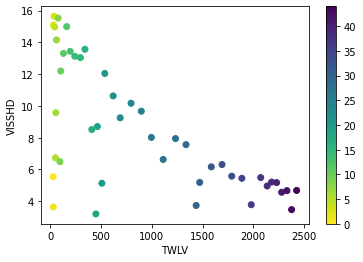

In [38]:
plot_scatter_dynamics(output1, y='VISSHD', x='TWLV')

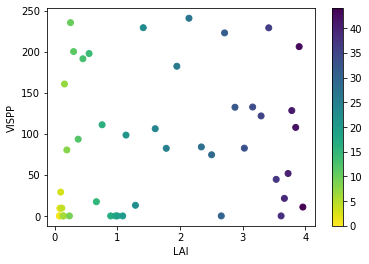

In [39]:
plot_scatter_dynamics(output1, x='LAI', y='VISPP') # VISPP doesn't depend on LAI!

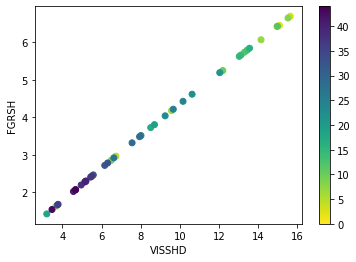

In [40]:
plot_scatter_dynamics(output1, x='VISSHD', y='FGRSH')

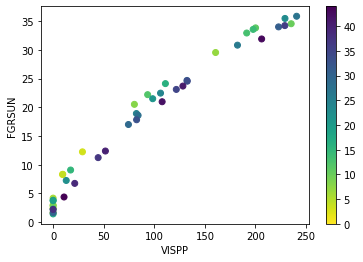

In [41]:
plot_scatter_dynamics(output1, x='VISPP', y='FGRSUN')

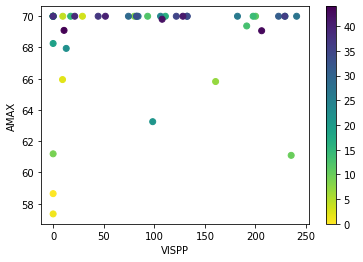

In [42]:
plot_scatter_dynamics(output1, x='VISPP', y='AMAX')

In [30]:
kdirbl = np.array(tmp['KDIRBL'])
fgrsun = np.array(tmp['FGRSUN'])
fgl = np.array(tmp['FGL'])
# What if we just ignore the shaded leaves?
y = fslla * fgrsun
plt.scatter(fgl, y, label='fslla')
plt.xlabel('FGL')
plt.ylabel('Estimated FGL')
plt.title("What if we just ignore the shaded leaves?")
plt.show()
# How much do we lose when we ignore the shaded leaves?
plt.scatter(fgl, (fgl-y))
plt.xlabel('FGL')
plt.ylabel('Estimation Loss')
plt.title("How much do we lose when we ignore the shaded leaves?")
plt.show()

NameError: name 'tmp' is not defined

In [31]:
def linear_fslla(lai):
    return 1-1/1.5*lai if lai < 1.5 else 0

def estimate_fslla(lai):
    x = np.array(list(map(linear_fslla, lai)))
    return x

y = np.exp(-kdirbl*0.5*lai) # * fgrsun # Actual term
plt.scatter(lai, y, label='exp')

y = estimate_fslla(lai) # * fgrsun
plt.scatter(lai, y, label='1/lai')

plt.title('Estimating the FSLLA?')
plt.xlabel('LAI')
plt.ylabel('Estimated FSLLA')
plt.legend()


NameError: name 'kdirbl' is not defined

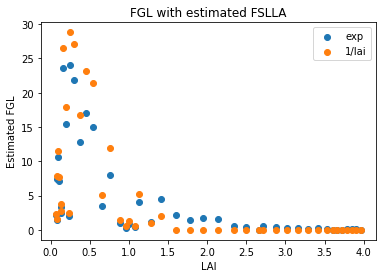

In [45]:
y = np.exp(-kdirbl*0.5*lai) * fgrsun # Actual term
plt.scatter(lai, y, label='exp')

y = estimate_fslla(lai) * fgrsun
plt.scatter(lai, y, label='1/lai')

plt.title('FGL with estimated FSLLA')
plt.xlabel('LAI')
plt.ylabel('Estimated FGL')
plt.legend()

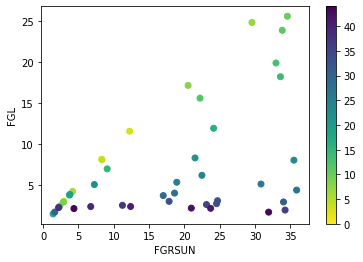

In [46]:
plot_scatter_dynamics(output1, x='FGRSUN', y='FGL')

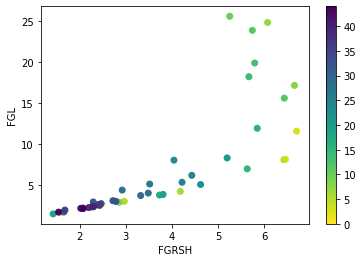

In [47]:
plot_scatter_dynamics(output1, x='FGRSH', y='FGL')

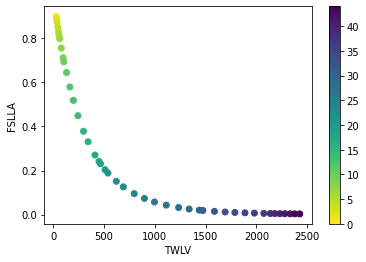

In [48]:
# FSLLA: % sunlit = exp(-LAI) for young plant, it's 0 for mature plant
plot_scatter_dynamics(output1, x='TWLV', y='FSLLA')

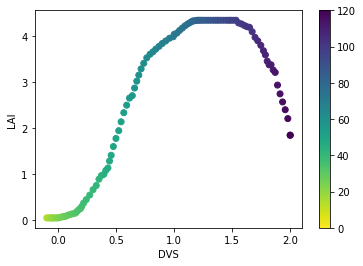

In [49]:
plot_scatter_dynamics(output, x='DVS', y='LAI')

<ipython-input-50-983276325d30>:10: RuntimeWarning: invalid value encountered in true_divide
  y0 = amax * (1 - (amax - fgrsh) * (1 - np.exp(-vispp * eff / new_amax)) / (eff * vispp))
<ipython-input-50-983276325d30>:13: RuntimeWarning: invalid value encountered in true_divide
  y1 = amax * (1 - (amax) * (1 - np.exp(-vispp * eff / new_amax)) / (eff * vispp))


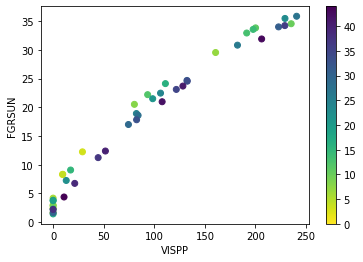

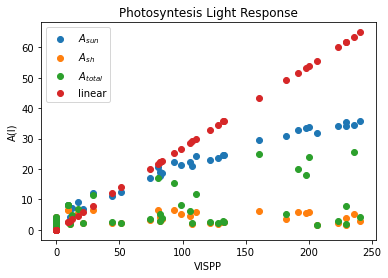

In [50]:
# Trying to model FGRSUN
kdirbl = np.array(tmp['KDIRBL'])
fgrsun = np.array(tmp['FGRSUN'])
fgrsh = np.array(tmp['FGRSH'])

vispp = np.array(tmp['VISPP'])
eff = np.array(tmp['EFF'])
amax = np.array(tmp['AMAX'])
new_amax = np.array([i if i > 2. else 2 for i in amax])
y0 = amax * (1 - (amax - fgrsh) * (1 - np.exp(-vispp * eff / new_amax)) / (eff * vispp))
# assume fgrsh = 0, lower than the original FGRSUN

y1 = amax * (1 - (amax) * (1 - np.exp(-vispp * eff / new_amax)) / (eff * vispp))
y2 = amax * (1 - np.exp(-vispp * eff / new_amax))
plot_scatter_dynamics(output1, x='VISPP', y='FGRSUN')

y_concise = amax * (vispp * eff / (vispp * eff + amax)) # From concise formulation on Spitters 1986
# eff = 0.45
y_linear = kdif * eff * vispp  # From our formulation


plt.scatter(vispp, fgrsun, label='$A_{sun}$')
plt.scatter(vispp, fgrsh, label='$A_{sh}$')
plt.scatter(vispp, fgl, label='$A_{total}$')
# plt.scatter(vispp, y0, alpha=0.5, label='matching expression')
# plt.scatter(vispp, y1, label='fgrsh=0')
# plt.scatter(vispp, y2, label='simple exp')
# plt.scatter(vispp, y_concise, label='concise')
plt.scatter(vispp, y_linear, label='linear')
plt.title('Photosyntesis Light Response')
plt.xlabel('VISPP')
plt.ylabel('A(I)')
plt.legend()

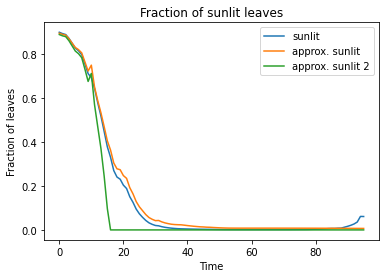

In [51]:
# wo.varnames
plt.title('Fraction of sunlit leaves')
plt.plot(wo_all.FSLLA, label='sunlit')
LAI = wo_all.SLAT * wo_all.TWLV
plt.plot(np.exp(-wo_all.KDIRBL*LAI*0.5), label='approx. sunlit')

linear_fslla = (1 - wo_all.KDIRBL*LAI*0.5) # linear approx. of the exponential term above
linear_fslla = np.where(linear_fslla < 0, 0, linear_fslla)
plt.plot(linear_fslla, label='approx. sunlit 2')

# piecewise_ratio = np.zeros(len(wo_all.day))
# C = 14
# piecewise_ratio[:C] = np.ones(C)
# plt.plot(piecewise_ratio, label='piecewise sunlit')

# plt.plot((1 - wo_all.FSLLA), label='shaded')

plt.ylabel('Fraction of leaves')
plt.xlabel('Time')
plt.legend()

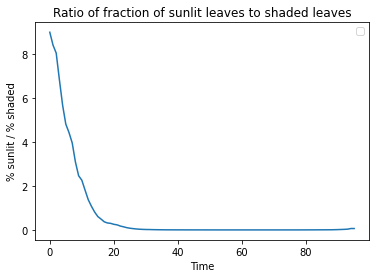

In [52]:
plt.title('Ratio of fraction of sunlit leaves to shaded leaves')
ratio = wo_all.FSLLA  / (1 - wo_all.FSLLA) 
plt.plot(ratio)
plt.ylabel('% sunlit / % shaded')
plt.xlabel('Time')
plt.legend()

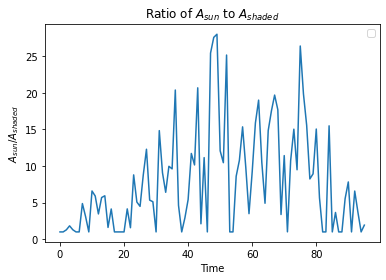

In [53]:
plt.title('Ratio of $A_{sun}$ to $A_{shaded}$')
ratio = wo_all.FGRSUN / wo_all.FGRSH

# ratio = wo_all.FSLLA * wo_all.FGRSUN / ((1 - wo_all.FSLLA) * wo_all.FGRSH)
plt.plot(ratio)
plt.ylabel('$A_{sun} / A_{shaded}$')
plt.xlabel('Time')
plt.legend()

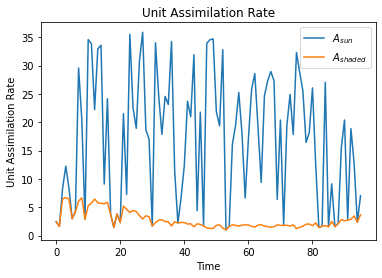

In [54]:
plt.title('Unit Assimilation Rate')
ratio = wo_all.FGRSUN 

# ratio = wo_all.FSLLA * wo_all.FGRSUN / ((1 - wo_all.FSLLA) * wo_all.FGRSH)
plt.plot( wo_all.FGRSUN, label = '$A_{sun}$')
plt.plot( wo_all.FGRSH, label = '$A_{shaded}$')
plt.ylabel('Unit Assimilation Rate')
plt.xlabel('Time')
plt.legend()

Text(0.5, 0, 'Time')

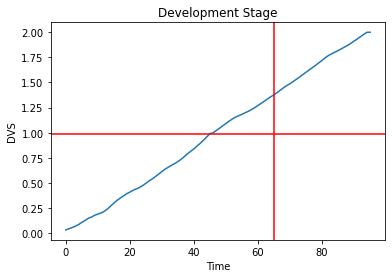

In [55]:
plt.plot(wo_all.DVS)
plt.axhline(y=0.99, c='r')

plt.axvline(x=65, c='r')
plt.title('Development Stage')
plt.ylabel('DVS')
plt.xlabel('Time')

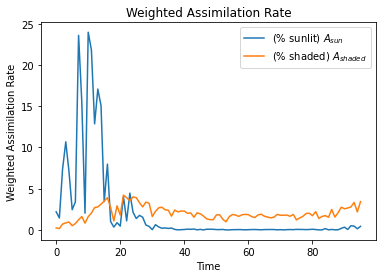

In [56]:
plt.title('Weighted Assimilation Rate')
ratio = wo_all.FGRSUN 

# ratio = wo_all.FSLLA * wo_all.FGRSUN / ((1 - wo_all.FSLLA) * wo_all.FGRSH)
plt.plot(wo_all.FSLLA * wo_all.FGRSUN, label = '(% sunlit) $A_{sun}$')
plt.plot((1 - wo_all.FSLLA) * wo_all.FGRSH, label = '(% shaded) $A_{shaded}$')
plt.ylabel('Weighted Assimilation Rate')
plt.xlabel('Time')
plt.legend()

# Modeling assimilation rate as a function of VISPP and VISSHD separately
# *A = (%sunlit leaves) x A_sun + (%shaded leaves) x A_shaded*

# 


# Approximating FGRSUN
THIS IS NOT NECESSARY BECAUSE VISPP (LIGHT ABSORBED BY SUNLIT LEAVES) DOESN'T DEPEND OF WEIGHT, HENCE WE DON'T NEED TO DO LINEAR APPROXIMATION FOR THE EXPONENTIAL TERM HERE. IT'S JUST A FUNCTION OF TIME. 

<ipython-input-57-a288e09c97fa>:4: RuntimeWarning: invalid value encountered in true_divide
  y = wo.AMAX * (1 - (wo.AMAX - wo.FGRSH) * ((1 - np.exp(-wo.VISPP * wo.EFF / wo.AMAX)) / (wo.VISPP * wo.EFF)))


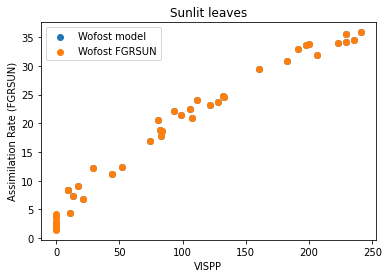

Text(0.5, 1.0, 'Sunlit leaves')

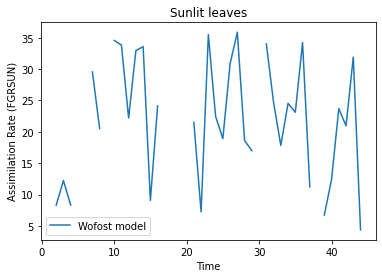

In [57]:
# Approximating FGRSUN 
# y = np.exp(-wo.VISPP * wo.EFF / wo.AMAX)
# y_linear = 1 - (wo.VISPP * wo.EFF / wo.AMAX)
y = wo.AMAX * (1 - (wo.AMAX - wo.FGRSH) * ((1 - np.exp(-wo.VISPP * wo.EFF / wo.AMAX)) / (wo.VISPP * wo.EFF)))
plt.scatter(wo.VISPP, y, label='Wofost model')

plt.scatter(wo.VISPP, wo.FGRSUN, label='Wofost FGRSUN')
# plt.scatter(wo.VISPP, y_linear, label='linear model')
plt.xlabel('VISPP')
plt.ylabel('Assimilation Rate (FGRSUN)')
plt.title('Sunlit leaves')
plt.legend()
plt.show()
plt.plot(range(len(y)), y, label='Wofost model')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Assimilation Rate (FGRSUN)')
plt.title('Sunlit leaves')

<ipython-input-58-aff74c533ada>:4: RuntimeWarning: invalid value encountered in true_divide
  y = wo_all.AMAX * (1 - (wo_all.AMAX - wo_all.FGRSH) * ((1 - np.exp(-wo_all.VISPP * wo_all.EFF / wo_all.AMAX)) / (wo_all.VISPP * wo_all.EFF)))


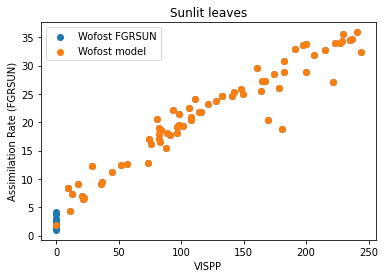

Text(0.5, 1.0, 'Sunlit leaves')

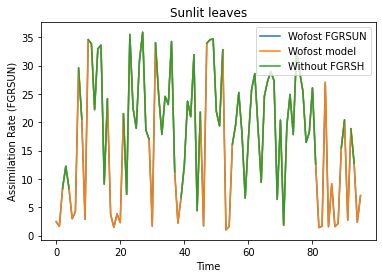

In [58]:
# Approximating FGRSUN 
# y = np.exp(-wo_all.VISPP * wo_all.EFF / wo_all.AMAX)
# y_linear = 1 - (wo_all.VISPP * wo_all.EFF / wo_all.AMAX)
y = wo_all.AMAX * (1 - (wo_all.AMAX - wo_all.FGRSH) * ((1 - np.exp(-wo_all.VISPP * wo_all.EFF / wo_all.AMAX)) / (wo_all.VISPP * wo_all.EFF)))
y_new = np.where(wo_all.VISPP <= 0, wo_all.FGRSH, y)
plt.scatter(wo_all.VISPP, wo_all.FGRSUN, label='Wofost FGRSUN')
plt.scatter(wo_all.VISPP, y, label='Wofost model')
# plt.scatter(wo_all.VISPP, y_linear, label='linear model')
plt.xlabel('VISPP')
plt.ylabel('Assimilation Rate (FGRSUN)')
plt.title('Sunlit leaves')
plt.legend()
plt.show()

plt.plot(wo_all.FGRSUN, label='Wofost FGRSUN')
plt.plot(y_new, label='Wofost model')
plt.plot(y, label='Without FGRSH')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Assimilation Rate (FGRSUN)')
plt.title('Sunlit leaves')

# Approximating FGRSH

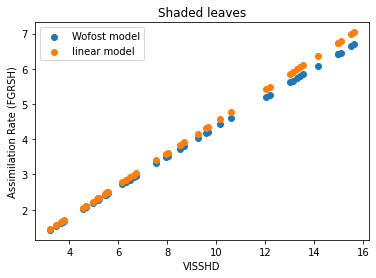

In [59]:
# Approximating FGRSH for Young Plants
y = wo.AMAX * (1 - np.exp(-wo.VISSHD * wo.EFF / wo.AMAX))
y_linear = wo.VISSHD * wo.EFF #wo.AMAX * (1 - (1 - (wo.VISSHD * wo.EFF / wo.AMAX)))

# plt.scatter(wo.VISSHD, wo.FGRSH, label='Wofost FGRSH') # same as the below
plt.scatter(wo.VISSHD, y, label='Wofost model')
plt.scatter(wo.VISSHD, y_linear, label='linear model')
plt.xlabel('VISSHD')
plt.ylabel('Assimilation Rate (FGRSH)')
plt.title('Shaded leaves')
plt.legend()

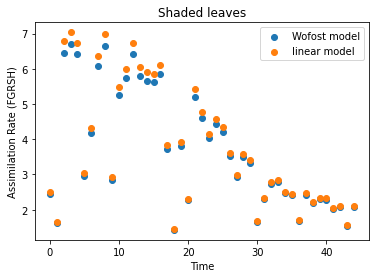

In [60]:
# Approximating FGRSH
plt.scatter(range(len(y)), y, label='Wofost model')
plt.scatter(range(len(y)), y_linear, label='linear model')
plt.xlabel('Time')
plt.ylabel('Assimilation Rate (FGRSH)')
plt.title('Shaded leaves')
plt.legend()

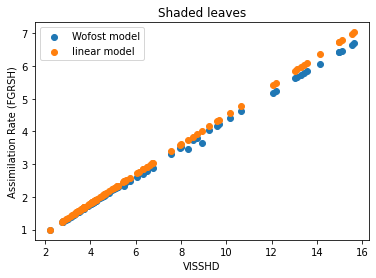

In [61]:
# Approximating FGRSH for Mature Plants
y = wo_all.AMAX * (1 - np.exp(-wo_all.VISSHD * wo_all.EFF / wo_all.AMAX))
y_linear = wo_all.VISSHD * wo_all.EFF #wo_all.AMAX * (1 - (1 - (wo_all.VISSHD * wo_all.EFF / wo_all.AMAX)))
# plt.scatter(wo_all.VISSHD, wo_all.FGRSH, label='wo_allfost FGRSH') # same as the below
plt.scatter(wo_all.VISSHD, y, label='Wofost model')
plt.scatter(wo_all.VISSHD, y_linear, label='linear model')
plt.xlabel('VISSHD')
plt.ylabel('Assimilation Rate (FGRSH)')
plt.title('Shaded leaves')
plt.legend()

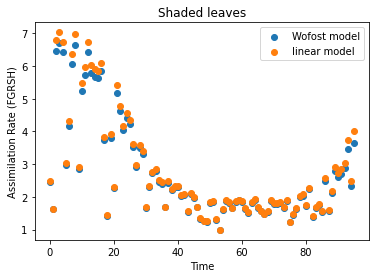

In [62]:
# Approximating FGRSH
plt.scatter(range(len(y)), y, label='Wofost model')
plt.scatter(range(len(y)), y_linear, label='linear model')
plt.xlabel('Time')
plt.ylabel('Assimilation Rate (FGRSH)')
plt.title('Shaded leaves')
plt.legend()

# FGL = (%sunlit) FGRSUN + (%shaded) FGRSH

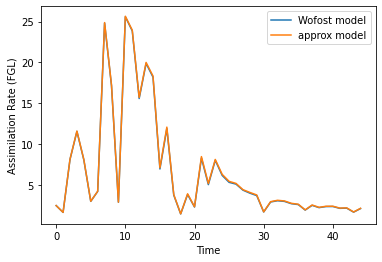

In [63]:
# Approximate FGRSH
# Young plant
FSLLA = wo.FSLLA
FGRSUN = wo.FGRSUN 
FGRSH = wo.VISSHD * wo.EFF
FGL = FSLLA * FGRSUN + (1 - FSLLA) * FGRSH
plt.plot(wo.FGL, label='Wofost model')
plt.plot(FGL, label='approx model')
plt.xlabel('Time')
plt.ylabel('Assimilation Rate (FGL)')
plt.legend()

<ipython-input-64-8f647aad84d6>:3: RuntimeWarning: invalid value encountered in true_divide
  FGRSUN = wo_all.AMAX * (1 - (wo_all.AMAX - wo_all.FGRSH) * ((1 - np.exp(-wo_all.VISPP * wo_all.EFF / wo_all.AMAX)) / (wo_all.VISPP * wo_all.EFF)))


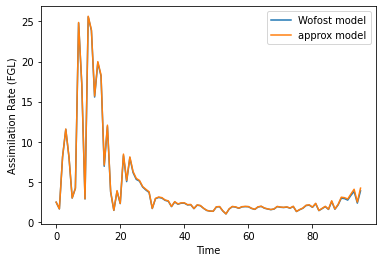

In [64]:
# All plant
FSLLA = wo_all.FSLLA
FGRSUN = wo_all.AMAX * (1 - (wo_all.AMAX - wo_all.FGRSH) * ((1 - np.exp(-wo_all.VISPP * wo_all.EFF / wo_all.AMAX)) / (wo_all.VISPP * wo_all.EFF)))
FGRSUN = np.where(wo_all.VISPP <= 0, wo_all.FGRSH, FGRSUN) # wo_all.FGRSUN 
FGRSH = wo_all.VISSHD * wo_all.EFF
FGL = FSLLA * FGRSUN + (1 - FSLLA) * FGRSH
plt.plot(wo_all.FGL, label='Wofost model')
plt.plot(FGL, label='approx model')
plt.xlabel('Time')
plt.ylabel('Assimilation Rate (FGL)')
plt.legend()

# Approximating FSLLA

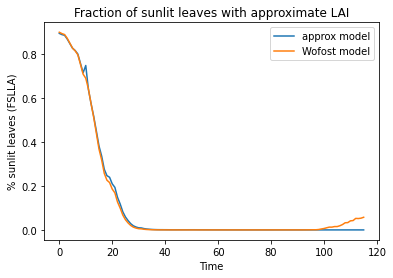

In [11]:
# All plant
# FSLLA = np.exp(-wo_all.LAI * wo_all.KDIRBL * 0.5) # Wofost equation

# Approximate LAI
LAI = wo_all.TWLV * wo_all.SLAT
FSLLA = np.exp(-LAI * wo_all.KDIRBL * 0.5) # Wofost equation

plt.plot(FSLLA, label='approx model')
plt.plot(wo_all.FSLLA, label='Wofost model')
plt.xlabel('Time')
plt.ylabel('% sunlit leaves (FSLLA)')
plt.title('Fraction of sunlit leaves with approximate LAI')
plt.legend()

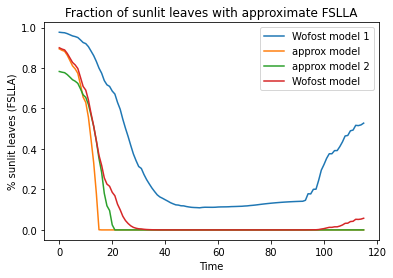

In [33]:
# Approximate FSLLA 
FSLLA = np.exp(-wo_all.LAI * wo_all.KDIRBL * 0.112) # Wofost equation
plt.plot(FSLLA, label='Wofost model 1')

FSLLA = np.maximum(0, 1 - wo_all.LAI * wo_all.KDIRBL * 0.5) # Approximation by (e^x = 1 + x) near zero.

level=0.5
k = wo_all.KDIRBL * level
f = lambda a: np.exp(-k * a)
f_prime = lambda a: -k * np.exp(-k * a)
a = 0.5
approx = f(a) + f_prime(a) * (wo_all.LAI - a)
FSLLA2 = np.maximum(0, approx) # Approximation by (e^x = 1 + x) near zero.

plt.plot(FSLLA, label='approx model')
plt.plot(FSLLA2, label='approx model 2')

plt.plot(wo_all.FSLLA, label='Wofost model')
plt.xlabel('Time')
plt.ylabel('% sunlit leaves (FSLLA)')
plt.title('Fraction of sunlit leaves with approximate FSLLA')
plt.legend()

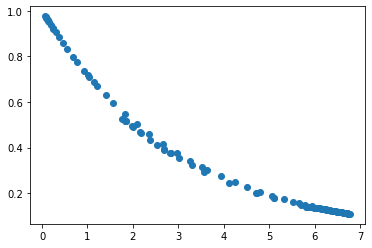

In [34]:
# Approximate FSLLA 
FSLLA = np.exp(-wo_all.LAI * wo_all.KDIRBL * 0.112) # Wofost equation
plt.scatter(wo_all.LAI, FSLLA, label='Wofost model 1')

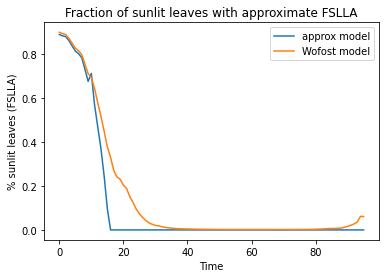

<ipython-input-67-3eae9e3daba4>:17: RuntimeWarning: invalid value encountered in true_divide
  FGRSUN = wo_all.AMAX * (1 - (wo_all.AMAX - wo_all.FGRSH) * ((1 - np.exp(-wo_all.VISPP * wo_all.EFF / wo_all.AMAX)) / (wo_all.VISPP * wo_all.EFF)))


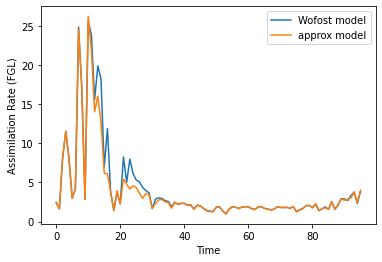

In [67]:
# Approximate FGL using approx. FGRSH, approx. LAI and approx. FSLLA
# Approximate LAI 
LAI = wo_all.TWLV * wo_all.SLAT

# Approximate FSLLA 
FSLLA = np.maximum(0, 1 - LAI * wo_all.KDIRBL * 0.5) # Approximation by (e^x = 1 + x) near zero.
plt.plot(FSLLA, label='approx model')
plt.plot(wo_all.FSLLA, label='Wofost model')
plt.xlabel('Time')
plt.ylabel('% sunlit leaves (FSLLA)')
plt.title('Fraction of sunlit leaves with approximate FSLLA')
plt.legend()
plt.show()

# Approximate FGRSH
FGRSH = wo_all.VISSHD * wo_all.EFF 
FGRSUN = wo_all.AMAX * (1 - (wo_all.AMAX - wo_all.FGRSH) * ((1 - np.exp(-wo_all.VISPP * wo_all.EFF / wo_all.AMAX)) / (wo_all.VISPP * wo_all.EFF)))
FGRSUN = np.where(wo_all.VISPP <= 0, wo_all.FGRSH, FGRSUN) # wo_all.FGRSUN 

# Approximate FGL
FGL = FSLLA * FGRSUN + (1 - FSLLA) * FGRSH
plt.plot(wo_all.FGL, label='Wofost model')
plt.plot(FGL, label='approx model')
plt.xlabel('Time')
plt.ylabel('Assimilation Rate (FGL)')
plt.legend()

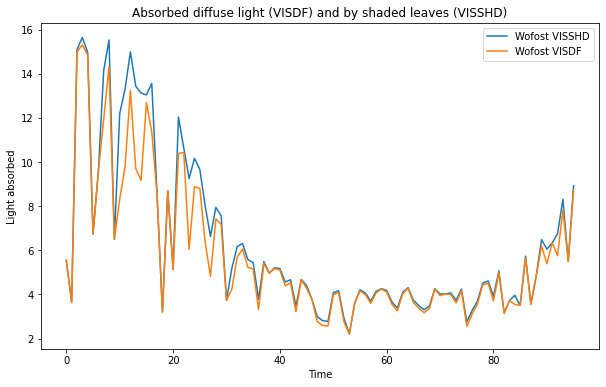

In [116]:
# Approximate VISSHD
# Ignore VIST and VISD. Assume VISSHD = VISDF. 
plt.plot(wo_all.VISSHD, label='Wofost VISSHD')
plt.plot(wo_all.VISDF, label='Wofost VISDF')

VISDF = (1 - wo_all.REFS) * wo_all.PARDIF * wo_all.KDIF * np.exp(-wo_all.KDIF * wo_all.LAI * 0.5) # Wofost VISDF
# plt.plot(VISDF, label='modeled VISDF') # same as the wofost VISDF

# VISSHD = (1 - wo_all.REFS) * wo_all.PARDIF * wo_all.KDIF * (1 - wo_all.KDIF * wo_all.LAI * 0.5) # Linear approx.
# plt.plot(VISSHD, label='approx. model') 

plt.xlabel('Time')
plt.title('Absorbed diffuse light (VISDF) and by shaded leaves (VISSHD)')
plt.ylabel('Light absorbed')
plt.legend()

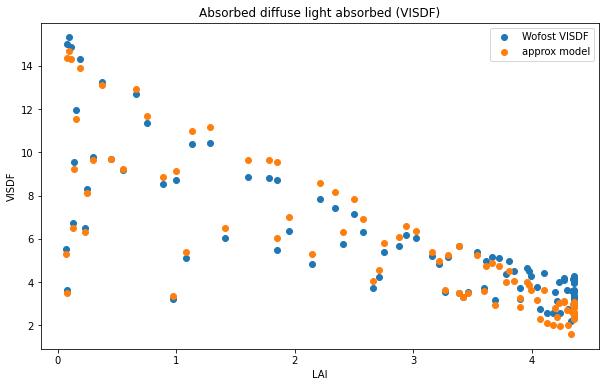

In [117]:
# plt.scatter(wo_all.LAI, wo_all.VISSHD, label = 'Wofost VISSHD')
plt.scatter(wo_all.LAI, wo_all.VISDF, label = 'Wofost VISDF')

# plt.scatter(wo_all.LAI, VISSHD, label='model') #linear approx near a=0

# Linear approximation of e^x at a = N/2
f = lambda x: np.exp(-wo_all.KDIF * x * 0.5)
f_prime = lambda x: np.exp(-wo_all.KDIF * x * 0.5) * (-wo_all.KDIF * 0.5)

x = wo_all.LAI 
a = (max(wo_all.LAI) - min(wo_all.LAI)) / 2
approx = f(a) + f_prime(a) * (x - a)

# VISSHD2 = (1 - wo_all.REFS) * wo_all.PARDIF * wo_all.KDIF * approx
# plt.scatter(wo_all.LAI, VISSHD2, label='model2')

VISSHD3 = wo_all.PARDIF * wo_all.KDIF * approx #Without (1 - REFS) because we don't consider the VIST or VISD
plt.scatter(wo_all.LAI, VISSHD3, label='approx model')
plt.xlabel('LAI')
plt.title('Absorbed diffuse light absorbed (VISDF)')
plt.ylabel('VISDF')
plt.legend()

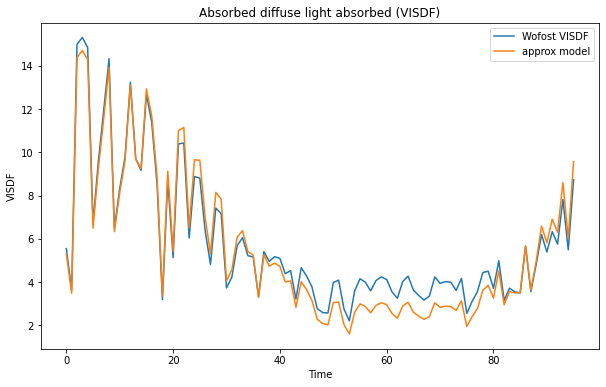

In [118]:
# plt.plot(wo_all.VISSHD, label='Wofost VISSHD')
plt.plot(wo_all.VISDF, label='Wofost VISDF')

# plt.plot(VISDF, label='VISDF')
# plt.plot(VISSHD, label='approx. model')
# plt.plot(VISSHD2, label='approx. model 2')

plt.plot(VISSHD3, label='approx model')

plt.xlabel('Time')
plt.title('Absorbed diffuse light absorbed (VISDF)')
plt.ylabel('VISDF')
plt.legend()

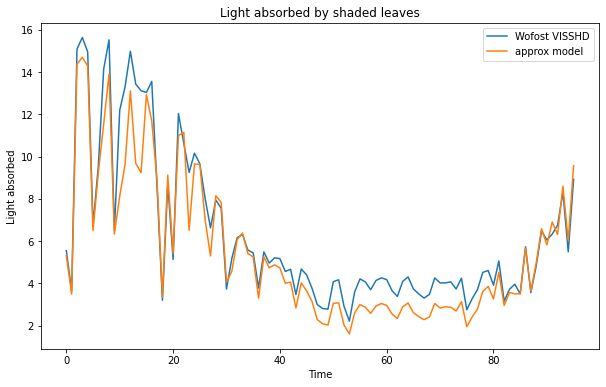

In [119]:
# Combined assumptions: i.e. VISSHD = VISDF = linear approximation
plt.plot(wo_all.VISSHD, label='Wofost VISSHD')
plt.plot(VISSHD3, label='approx model')
plt.xlabel('Time')
plt.title('Light absorbed by shaded leaves')
plt.ylabel('Light absorbed')
plt.legend()

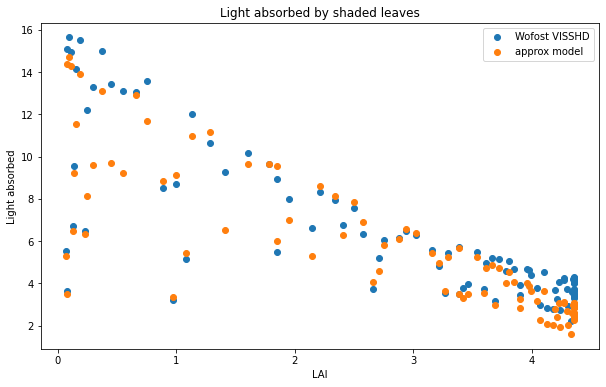

In [121]:
plt.scatter(wo_all.LAI, wo_all.VISSHD, label='Wofost VISSHD')
plt.scatter(wo_all.LAI, VISSHD3, label='approx model')
plt.xlabel('LAI')
plt.title('Light absorbed by shaded leaves')
plt.ylabel('Light absorbed')
plt.legend()

# Approximate Model

In [7]:
def assim_sunlit(AMAX, FGRSH, VISPP, EFF):
    FGRSUN = AMAX * (1 - (AMAX - FGRSH) * ((1 - np.exp(-VISPP * EFF / AMAX)) / (VISPP * EFF)))
    FGRSUN = np.where(VISPP <= 0, FGRSH, FGRSUN) # wo_all.FGRSUN
    return FGRSUN

def assim_shaded(VISSHD, EFF):
    FGRSH = VISSHD * EFF 
    return FGRSH
    
def ratio_sunlit(KDIRBL, LAI):
    FSLLA = np.maximum(0, 1 - LAI * KDIRBL * 0.5) # Approximation by (e^x = 1 + x) near zero.
    return FSLLA

def leaf_area_index(SLAT, TWLV):
    return TWLV * SLAT
    
def light_sun(VISPP):
    return VISPP

def light_shaded(KDIF, PARDIF, LAI):
    f = lambda x: np.exp(-KDIF * x * 0.5)
    f_prime = lambda x: np.exp(-KDIF * x * 0.5) * (-KDIF * 0.5)
    a = (max(LAI) - min(LAI)) / 2
    approx = f(a) + f_prime(a) * (LAI - a)
    VISSHD = PARDIF * KDIF * approx # Without (1 - REFS) because we don't consider the VIST or VISD
    return VISSHD
    
def weighted_assim(FSLLA, FGRSUN, FGRSH):
    FGL = FSLLA * FGRSUN + (1 - FSLLA) * FGRSH
    return FGL

def approx_simulation(wo):
    LAI =  leaf_area_index(wo.SLAT, wo.TWLV) # Here TWLV needs to be our computed Weight! 
    VISSHD = light_shaded(wo.KDIF, wo.PARDIF, LAI)
    FGRSH = assim_shaded(VISSHD, wo.EFF)
    FGRSUN = assim_sunlit(wo.AMAX, FGRSH, wo.VISPP, wo.EFF)
    FSLLA = ratio_sunlit(wo.KDIRBL, LAI)
    FGL = weighted_assim(FSLLA, FGRSUN, FGRSH)
    return FGL

In [8]:
params, wdp, agromanagement = example_wofost_params(verbose=False)
wofost = Wofost71_WLP_FD(params, wdp, agromanagement) # water-limited production
wofost.run_till_terminate()
output = wofost.get_output()
summary_out = wofost.get_summary_output()
wo_all = WofostOutput(output[25:])

weighted_assimilation_rate = approx_simulation(wo_all)


<ipython-input-7-4e8fa3611ec6>:2: RuntimeWarning: invalid value encountered in true_divide
  FGRSUN = AMAX * (1 - (AMAX - FGRSH) * ((1 - np.exp(-VISPP * EFF / AMAX)) / (VISPP * EFF)))


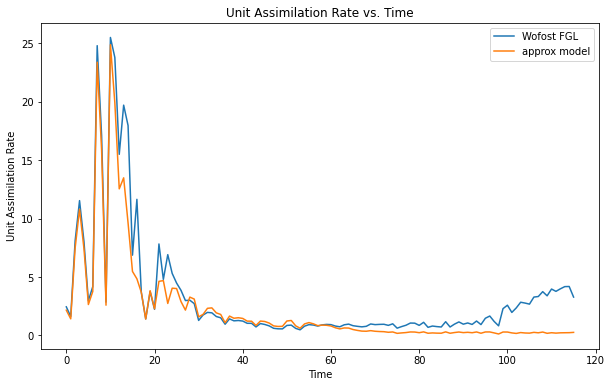

In [10]:
fig = plt.figure(figsize=(10, 6))
plt.plot(wo_all.FGL, label='Wofost FGL')
plt.plot(weighted_assimilation_rate, label='approx model')
plt.xlabel('Time')
plt.title('Unit Assimilation Rate vs. Time')
plt.ylabel('Unit Assimilation Rate')
plt.legend()

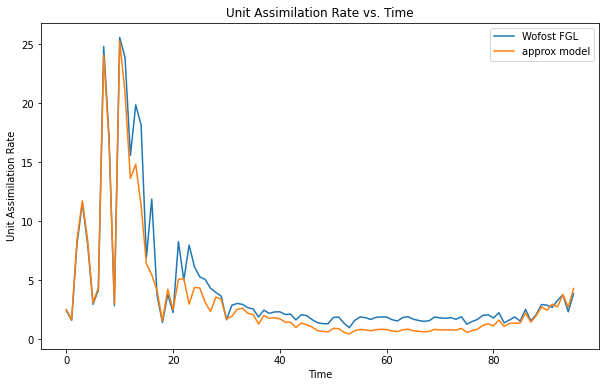

In [127]:
plt.plot(wo_all.FGL, label='Wofost FGL')
plt.plot(weighted_assimilation_rate, label='approx model')
plt.xlabel('Time')
plt.title('Unit Assimilation Rate vs. Time')
plt.ylabel('Unit Assimilation Rate')
plt.legend()

In [304]:
# full = wo.AMAX * (1 - (wo.AMAX - wo.FGRSH) * (1 - np.exp(-wo.VISPP * wo.EFF / np.maximum(2.0, wo.AMAX))) / (wo.EFF * wo.VISPP))
# full = np.where(wo.VISPP > 0, full, wo.FGRSH)

# # Remove FGRSH from AMAX - FGRSH
# no_fgrsh = wo.AMAX * (1 - (wo.AMAX) * (1 - np.exp(-wo.VISPP * wo.EFF / np.maximum(2.0, wo.AMAX))) / (wo.EFF * wo.VISPP))
# no_fgrsh = np.where(wo.VISPP > 0, no_fgrsh, wo.FGRSH)

# # exp_sun = wo.AMAX * (1 - np.exp(-wo.VISPP * wo.EFF / np.maximum(2.0, wo.AMAX)))
# exp_sun = wo.AMAX * (1 - np.exp(-wo.VISPP * wo.EFF / wo.AMAX))

# linear_sun = wo.AMAX * (1 - np.exp(-wo.VISPP * wo.EFF / wo.AMAX))

# plt.plot(full, label='true model')
# plt.plot(no_fgrsh, label='approximate model')
# plt.plot(exp_sun, label='exp model')

# # plt.plot(wo.FGRSUN, label='Wofost')
# plt.xlabel('Time')
# plt.ylabel('Assimilation Rate')
# plt.legend()

In [305]:
# full = wo_all.AMAX * (1 - (wo_all.AMAX - wo_all.FGRSH) * (1 - np.exp(-wo_all.VISPP * wo_all.EFF / np.maximum(2.0, wo_all.AMAX))) / (wo_all.EFF * wo_all.VISPP))
# full = np.where(wo_all.VISPP > 0, full, wo_all.FGRSH)

# # Remove FGRSH from AMAX - FGRSH
# no_fgrsh = wo_all.AMAX * (1 - (wo_all.AMAX) * (1 - np.exp(-wo_all.VISPP * wo_all.EFF / np.maximum(2.0, wo_all.AMAX))) / (wo_all.EFF * wo_all.VISPP))
# no_fgrsh = np.where(wo_all.VISPP > 0, no_fgrsh, wo_all.FGRSH)

# # exp_sun = wo_all.AMAX * (1 - np.exp(-wo_all.VISPP * wo_all.EFF / np.maximum(2.0, wo_all.AMAX)))
# exp_sun = wo_all.AMAX * (1 - np.exp(-wo_all.VISPP * wo_all.EFF / wo_all.AMAX))

# linear_sun = wo_all.AMAX * (1 - np.exp(-wo_all.VISPP * wo_all.EFF / wo_all.AMAX))

# plt.plot(full, label='true model')
# plt.plot(no_fgrsh, label='approximate model')
# # plt.plot(exp_sun, label='exp model')

# # plt.plot(wo_all.FGRSUN, label='Wofost')
# plt.xlabel('Time')
# plt.ylabel('Assimilation Rate')
# plt.legend()

In [306]:
# plt.scatter(wo.VISSHD, wo.FGRSH, label='$A_{shaded}$')
# # plt.scatter(wo.VISSHD, )
# plt.title('Photosynthetis Light Response')
# plt.xlabel('VISSHD')
# plt.ylabel('FGRSH')
# plt.legend()
# plt.show()

# plt.scatter(wo.VISPP, wo.FGRSUN, label='$A_{sun}$')
# plt.scatter(wo.VISPP, no_fgrsh, label='approx model')
# plt.scatter(wo.VISPP, exp_sun, label='exp sun')

# plt.xlabel('VISPP')
# plt.ylabel('FGRSUN')
# plt.legend()

# Modeling assimilation rate as a function of PAR 
## (instead of VISPP and VISSHD separately) 


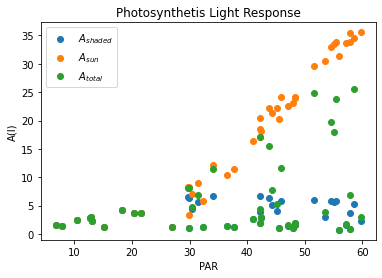

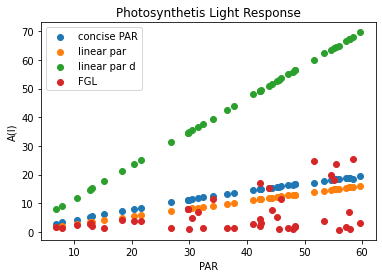

In [186]:
par = wo.PAR # input radiation
amax = wo.AMAX
kdif = wo.KDIF
eff = wo.EFF

y_linear_par = kdif * eff * par  # From our formulation
# y_linear_par_t = (amax / (1 + amax)) * wo.KDIRT * eff * par  # extinction coeff for total light
# y_linear_par_d = (amax / (1 + amax)) * wo.KDIRBL * eff * par  # extinction coeff for total light

y_concise_par = amax * (par * eff / (par * eff + amax)) # From concise formulation on Spitters 1986
plt.scatter(par, wo.FGRSH, label='$A_{shaded}$')
plt.scatter(par, wo.FGRSUN, label='$A_{sun}$')
plt.scatter(par, wo.FGL, label='$A_{total}$')

plt.title('Photosynthetis Light Response')
plt.xlabel('PAR')
plt.ylabel('A(I)')
plt.legend()
plt.show()

plt.scatter(par, y_concise_par, label='concise PAR')
plt.scatter(par, y_linear_par, label='linear par') 
plt.scatter(par, y_linear_par_t, label='linear par d')
plt.scatter(par, wo.FGL, label='FGL') 

plt.title('Photosynthetis Light Response')
plt.xlabel('PAR')
plt.ylabel('A(I)')
plt.legend()

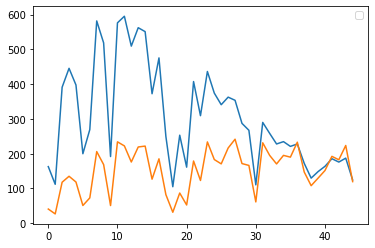

In [124]:
unit_assim = y_linear_par # From above cell
assim_rate = unit_assim * tmp["DAYL"] * np.array(tmp["LAI"]) 
# TODO: Write LAI in terms of TWLV
plt.plot(wo.DTGA/wo.LAI)
plt.plot(assim_rate/wo.LAI)
# plt.plot(tmp['DTGA'], label='Wofost')
# plt.plot(assim_rate, label='linear')
# plt.title('Daily Total CO2 Assimilation Rate')
# plt.ylabel('Assimilation Rate')
# plt.xlabel('t')
plt.legend()


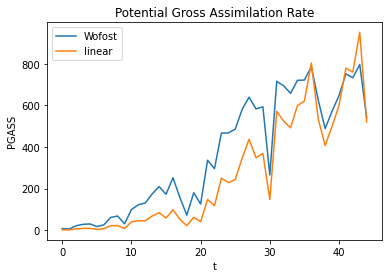

In [82]:
p_assim_rate = 30./44. * assim_rate
plt.plot(tmp['PGASS'], label='Wofost')
plt.plot(p_assim_rate, label='linear')
plt.title('Potential Gross Assimilation Rate')
plt.ylabel('PGASS')
plt.xlabel('t')
plt.legend()

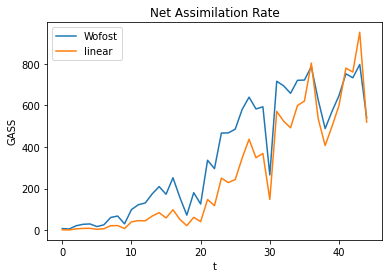

In [83]:
net_assim_rate = p_assim_rate * np.array(tmp["RFTRA"]) # rftra=1 
plt.plot(tmp['GASS'], label='Wofost')
plt.plot(net_assim_rate, label='linear')
plt.title('Net Assimilation Rate')
plt.ylabel('GASS')
plt.xlabel('t')
plt.legend()

In [78]:
net_assim_rate

array([ 27.9046331 ,  18.36281896,  80.48190515,  92.15533799,
        80.90408788,  34.84275295,  49.75925904, 140.55879051,
       115.03894041,  34.76870754, 159.61942858, 151.66631408,
       120.11222935, 149.55103191, 151.29182333,  86.44982002,
       126.33114387,  56.10321649,  21.62567893,  59.28234565,
        35.89365271, 122.04891186,  83.90384259, 159.46406804,
       124.90302923, 116.46352694, 147.54755594, 164.77650542,
       117.04530512, 113.40997131,  41.87917546, 157.75921299,
       133.10265598, 116.32071067, 133.0796805 , 129.6422424 ,
       158.93310073, 100.436143  ,  73.71294395,  88.48761431,
       103.44603958, 131.18218953, 124.49398791, 152.50161224,
        81.67436727])

In [51]:
# a = np.array([1, 2, 3, 4, 5])
# a.cumsum()

Text(0.5, 0, 't')

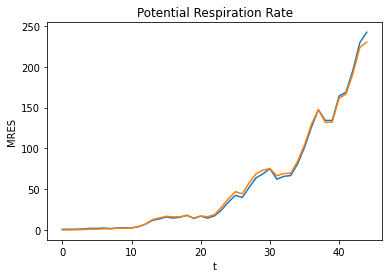

In [52]:
def coef_resp():
    coef_r = np.array(tmp["RMR"]) * np.array(tmp["FR"])
    coef_l = np.array(tmp["RML"]) * np.array(tmp["FL"]) * (1-np.array(tmp["FR"]))
    coef_s = np.array(tmp["RMS"]) * np.array(tmp["FS"]) * (1-np.array(tmp["FR"]))
    coef_o = np.array(tmp["RMO"]) * np.array(tmp["FO"]) * (1-np.array(tmp["FR"]))
    coef_res = coef_r + coef_l + coef_s + coef_o
    return np.array(tmp["RFSETB"]) * np.array(tmp["TEFF"]) * coef_res 

total_weight = np.array(tmp["DMI"]).cumsum() # need to use our own weights --> need to do the simulation iteratively

p_resp_rate = total_weight * coef_resp()
plt.plot(tmp['MRES'], label='Wofost')
plt.plot(p_resp_rate, label='linear')
plt.title('Potential Respiration Rate')
plt.ylabel('MRES')
plt.xlabel('t')

Text(0.5, 0, 't')

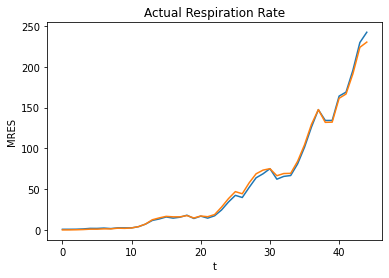

In [53]:
resp_rate = np.where(p_resp_rate < net_assim_rate, p_resp_rate, net_assim_rate) # min(GASS, PMRES)
plt.plot(tmp['MRES'], label='Wofost')
plt.plot(resp_rate, label='linear')
plt.title('Actual Respiration Rate')
plt.ylabel('MRES')
plt.xlabel('t')

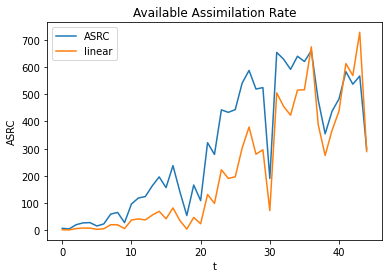

In [54]:
avail_assim_rate = net_assim_rate - resp_rate
plt.plot(tmp['ASRC'], label="ASRC")
plt.plot(avail_assim_rate , label="linear")
plt.title('Available Assimilation Rate')
plt.ylabel('ASRC')
plt.xlabel('t')
plt.legend()

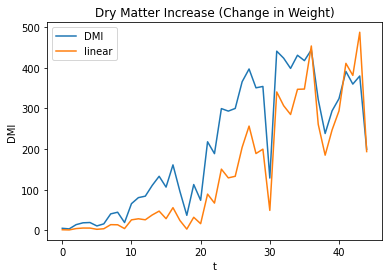

In [55]:
dmi = tmp["CVF"] * avail_assim_rate
plt.plot(tmp['DMI'], label="DMI")
plt.plot(dmi, label="linear")
plt.title("Dry Matter Increase (Change in Weight)")
plt.ylabel('DMI')
plt.xlabel('t')
plt.legend()

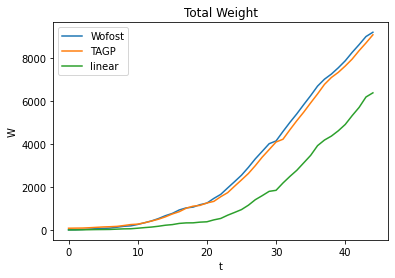

In [117]:
W = dmi.cumsum()
plt.plot(np.array(tmp['DMI']).cumsum(), label="Wofost")
plt.plot(wo.TAGP + wo.TWRT, label='TAGP + TWRT')
plt.plot(W, label="linear")
plt.title("Total Weight")
plt.ylabel('W')
plt.xlabel('t')
plt.legend()

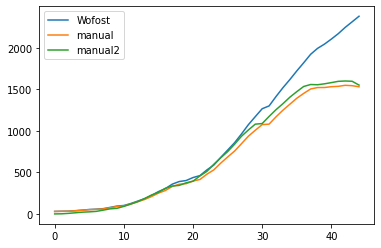

In [122]:
plt.plot(wo.TWRT, label="Wofost")
plt.plot((wo.TAGP + wo.TWRT)*wo.FR, label="manual")
plt.plot((wo.DMI.cumsum())*wo.FR, label="manual2")
plt.legend()

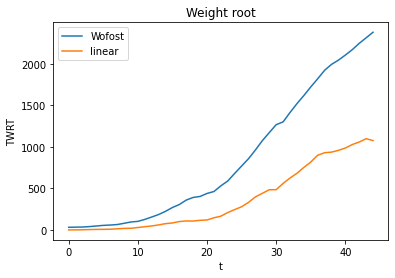

In [57]:
plt.plot(tmp["TWRT"], label="Wofost")
W_r = W*np.array(tmp["FR"])
plt.plot(W_r, label="linear")
plt.title("Weight root")
plt.ylabel('TWRT')
plt.xlabel('t')
plt.legend()

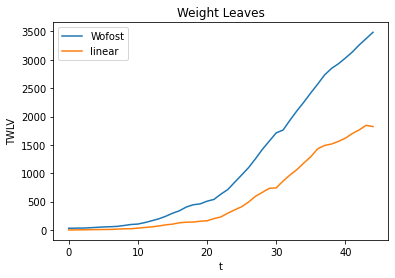

In [58]:
plt.plot(tmp["TWLV"], label="Wofost")
W_l = W*np.array(tmp["FL"])*(1-np.array(tmp["FR"]))
plt.plot(W_l, label="linear")
plt.title("Weight Leaves")
plt.ylabel('TWLV')
plt.xlabel('t')
plt.legend()

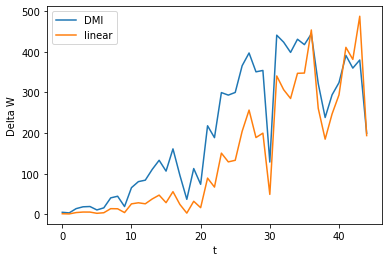

In [59]:
dmi = tmp["CVF"] * avail_assim_rate
plt.plot(tmp['DMI'], label="DMI")
plt.plot(dmi, label="linear")
plt.ylabel('Delta W')
plt.xlabel('t')
plt.legend()

# Our version of Wofost

In [60]:
def coef_resp(wo):
    coef_r = wo.RMR * wo.FR
    coef_l = wo.RML * wo.FL * (1 - wo.FR)
    coef_s = wo.RMS * wo.FS * (1 - wo.FR)
    coef_o = wo.RMO * wo.FO * (1 - wo.FR)
    coef_res = coef_r + coef_l + coef_s + coef_o
    return wo.RFSETB * wo.TEFF * coef_res

def assimilation(wo):
    
    
def respiration(wo):
    

IndentationError: expected an indented block (<ipython-input-60-8ed77e02ae83>, line 12)

In [61]:

T = len(output1)
CVF = wo.CVF
COEF_RESP = coef_resp(wo)

dmi = np.zeros(T)

TypeError: coef_resp() takes 0 positional arguments but 1 was given

In [ ]:
# 1: root, 2: storage organ, 3: stem, 4: leaves
alpha = [1, 2, 3, 4] 
def c(t):
    coeffs = [1, 2, 3, 4] 
    return coeffs

def q(t):
    q = f(t) * alpha[4] - sum([alpha[i] * c(t)[i] for i in range(4)])
    return q

# def w(t):
#     integral = np.sum(q)
#     return w0 * np.exp(integral)
    

In [ ]:
# Inputs:
w0 = # TDWI
T = 70 # Number of days to simulate


In [ ]:
weights = np.zeros(T)
weights[0] = W0
W = W0
for t in range(1, T):
    dW = q(t) * weights[t-1]
    weights[t] = weights[t-1] + dW
    
    
    

In [ ]:
# from wofost.py

# **State variables:**
#     =========== ================================================= ==== ===============
#      Name        Description                                      Pbl      Unit
#     =========== ================================================= ==== ===============
#     TAGP        Total above-ground Production                      N    |kg ha-1|
#     GASST       Total gross assimilation                           N    |kg CH2O ha-1|
#     MREST       Total gross maintenance respiration                N    |kg CH2O ha-1|
#     CTRAT       Total crop transpiration                           N    cm
#     HI          Harvest Index (only calculated during              N    -
#                 `finalize()`)
#     DOF         Date representing the day of finish of the crop    N    -
#                 simulation. 
#     FINISH_TYPE String representing the reason for finishing the   N    -
#                 simulation: maturity, harvest, leave death, etc.
#     =========== ================================================= ==== ===============

# **Rate variables:**
#     =======  ================================================ ==== =============
#      Name     Description                                      Pbl      Unit
#     =======  ================================================ ==== =============
#     GASS     Assimilation rate corrected for water stress       N  |kg CH2O ha-1 d-1|
#     MRES     Actual maintenance respiration rate, taking into
#              account that MRES <= GASS.                         N  |kg CH2O ha-1 d-1|
#     ASRC     Net available assimilates (GASS - MRES)            N  |kg CH2O ha-1 d-1|
#     DMI      Total dry matter increase, calculated as ASRC
#              times a weighted conversion efficiency.            Y  |kg ha-1 d-1|
#     ADMI     Aboveground dry matter increase                    Y  |kg ha-1 d-1|
#     =======  ================================================ ==== =============
    
    
# from leaf_dynamics.py

# **State variables**
#     =======  ================================================= ==== ============
#      Name     Description                                      Pbl      Unit
#     =======  ================================================= ==== ============
#     LV       Leaf biomass per leaf class                        N    |kg ha-1|
#     SLA      Specific leaf area per leaf class                  N    |ha kg-1|
#     LVAGE    Leaf age per leaf class                            N    |d|
#     LVSUM    Sum of LV                                          N    |kg ha-1|
#     LAIEM    LAI at emergence                                   N    -
#     LASUM    Total leaf area as sum of LV*SLA,                  N    -
#              not including stem and pod area                    N
#     LAIEXP   LAI value under theoretical exponential growth     N    -
#     LAIMAX   Maximum LAI reached during growth cycle            N    -
#     LAI      Leaf area index, including stem and pod area       Y    -
#     WLV      Dry weight of living leaves                        Y    |kg ha-1|
#     DWLV     Dry weight of dead leaves                          N    |kg ha-1|
#     TWLV     Dry weight of total leaves (living + dead)         Y    |kg ha-1|
#     =======  ================================================= ==== ============

# **Rate variables**
#     =======  ================================================= ==== ============
#      Name     Description                                      Pbl      Unit
#     =======  ================================================= ==== ============
#     GRLV     Growth rate leaves                                 N   |kg ha-1 d-1|
#     DSLV1    Death rate leaves due to water stress              N   |kg ha-1 d-1|
#     DSLV2    Death rate leaves due to self-shading              N   |kg ha-1 d-1|
#     DSLV3    Death rate leaves due to frost kill                N   |kg ha-1 d-1|
#     DSLV     Maximum of DLSV1, DSLV2, DSLV3                     N   |kg ha-1 d-1|
#     DALV     Death rate leaves due to aging.                    N   |kg ha-1 d-1|
#     DRLV     Death rate leaves as a combination of DSLV and     N   |kg ha-1 d-1|
#              DALV
#     SLAT     Specific leaf area for current time step,          N   |ha kg-1|
#              adjusted for source/sink limited leaf expansion
#              rate.
#     FYSAGE   Increase in physiological leaf age                 N   -
#     GLAIEX   Sink-limited leaf expansion rate (exponential      N   |ha ha-1 d-1|
#              curve) 
#     GLASOL   Source-limited leaf expansion rate (biomass        N   |ha ha-1 d-1|
#              increase)
#     =======  ================================================= ==== ============
    
# **External dependencies:**
    
#     ======== ============================== =============================== ===========
#      Name     Description                         Provided by               Unit
#     ======== ============================== =============================== ===========
#     DVS      Crop development stage         DVS_Phenology                    - 
#     FL       Fraction biomass to leaves     DVS_Partitioning                 -
#     FR       Fraction biomass to roots      DVS_Partitioning                 -
#     SAI      Stem area index                WOFOST_Stem_Dynamics             -
#     PAI      Pod area index                 WOFOST_Storage_Organ_Dynamics    -
#     TRA      Transpiration rate             Evapotranspiration              |cm day-1|
#     TRAMX    Maximum transpiration rate     Evapotranspiration              |cm day-1| 
#     ADMI     Above-ground dry matter        CropSimulation                  |kg ha-1 d-1|
#              increase
#     RF_FROST Reduction factor frost kill    FROSTOL                          -
#     ======== ============================== =============================== ===========
